**Step_1**

In [61]:
import tensorflow as tf
tf.__version__

'2.6.4'

In [62]:
import matplotlib.pyplot as plt

**Importing Datasets**
* Data sets used are already existed datasets

In [63]:
mnist = tf.keras.datasets.mnist # 28x28 images of handwritten digits 0-9 (10 classes)

Unpacking the datasets into X and Y plots of 'training' and 'testing'

In [64]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Showing the actual images in the [0] array. #Skippable step

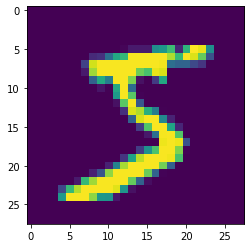

In [65]:
plt.imshow(x_train[0])

prints a binary of black and white image. #Skippable step

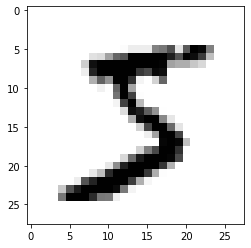

In [66]:
plt.imshow(x_train[0], cmap = plt.cm.binary) 

showing the multidimensional array of the image. #Skippable step

In [67]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

**Normalization**
* scaling the data

In [68]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

See the result of the scaling. #Skippable step

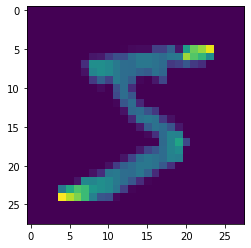

In [69]:
plt.imshow(x_train[0])

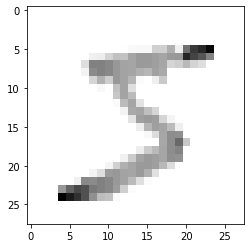

In [70]:
plt.imshow(x_train[0], cmap = plt.cm.binary) 

See the result of the scaling. 
the values are scalled down to 0-1 limit (instead of 0-255) #Skippable step

In [71]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building the Model**
* There are 2 types of models: sequential and functional model
* 'Sequential model' will be used (most common model)

In [72]:
model = tf.keras.models.Sequential()

adding the first layer (input layer).
* since the image is 28x28 (multidimensional array), we would want the dimensions to be flat. 
* **If doing convolution net, then do not flatten the dimensions**

In [73]:
model.add(tf.keras.layers.Flatten())

Adding the next layer (hidden layers)
* In this case, **2** hidden layers are used.
* With 128 unit of neurons in the layer.
* Passing the **activation function** or step function (what will be the "threshold" in order for the weights to be summed up and outputted out to the next or end layer). 
* By using **"Rectified Linear Unit" (ReLU)** as an activation function. (Default/common goto function)

In [74]:
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

2nd hidden layer

In [75]:
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

Adding the final layer (output layer)
* Since we are looking for 10 distinct classes (0-9), the output will have 10 unit of neurons
* Using **"softmax" for the activation function** as a probability distribution

In [76]:
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

**Defining parameters for the training model**

Compiling the model
* Optimizer used **'adam'** (handling the complex part of neural network, it is a stochastic gradient descent method, common)
* loss calculation (the accuracy of the model), **'sparse_categorical_crossentropy'** is the common one. 
* The metrics that is/are being tracked are **'accuracy'** of the model


In [77]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

**Training the model**
* passing the x_train and y_train, with epoch of 10 (epoch = number of training iteration)

In [78]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2645 - accuracy: 0.9221
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1084 - accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0714 - accuracy: 0.9777
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0532 - accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0410 - accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0306 - accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0248 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0220 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0172 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.014

**Evaluating the model**
* Evaluating in case there are overfitting, or else the model did not "learn" to solve inputs but instead "memorizes" the outputs for certain inputs.
* Checking the validation loss and accuracy

In [79]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1103 - accuracy: 0.9740
0.11027238517999649
0.9739999771118164


Validation accuracy - training accuracy = ~0.0207
validation loss - training loss = ~0.0959 

The validation accuracy and loss values should be less than the accuracy and the loss values in the final epoch. 
If the delta is too high or too low, it will either be overfitting or underfitting. 

**Saving the model**
* Saving the model into a directory path

In [81]:
model.save('/kaggle/working/number_reader.model')

**Loading the model**
* loading the model to be used again

In [82]:
new_model = tf.keras.models.load_model('/kaggle/working/number_reader.model')

**Testing the loaded model**
* after calling the model, then test it by predicting on the 'test' sample we already made (x_test)

In [84]:
predictions = new_model.predict([x_test])
print(predictions)

[[2.4656682e-13 3.2886114e-12 2.5637295e-08 ... 9.9999988e-01
  5.7318039e-12 1.6104228e-09]
 [7.7059046e-18 3.6827863e-10 1.0000000e+00 ... 2.6074732e-15
  1.6461375e-16 7.1661919e-25]
 [8.3726098e-15 9.9999237e-01 1.7741908e-09 ... 7.4322711e-06
  2.2758609e-07 9.1213920e-12]
 ...
 [3.7931671e-17 1.2804371e-12 1.9298959e-13 ... 9.1940283e-10
  2.3637665e-11 5.7593887e-08]
 [4.3017269e-19 2.0016368e-16 4.1941204e-18 ... 4.8314547e-11
  8.7187807e-08 3.2294458e-21]
 [6.5306124e-12 1.2358018e-14 9.9961008e-14 ... 1.0893672e-17
  1.1356650e-11 7.3056387e-17]]


Predicting the value of the image in array of 'x_test[0]' 

In [91]:
import numpy as np 
print(np.argmax(predictions[0]))

7


See manually if the image in array [0] is really "7"

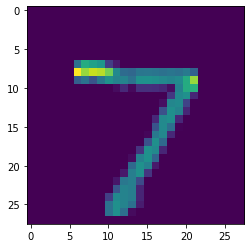

In [92]:
plt.imshow(x_test[0])

In [80]:
"""
Jamal Abo
3 years ago
17:50 Actually, 
predictions = new_model.predict([x_test])
broke the program,
then I changed it to
predictions = new_model.predict(x_test)
And it worked Fine :)
"""

'\nJamal Abo\n3 years ago\n17:50 Actually, \npredictions = new_model.predict([x_test])\nbroke the program,\nthen I changed it to\npredictions = new_model.predict(x_test)\nAnd it worked Fine :)\n'